In [19]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver

In [3]:
load_dotenv()

True

In [6]:
class ChatState(TypedDict):

    messages : Annotated[list[BaseMessage],add_messages]
    

In [8]:
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")


def chat_node(state: ChatState):

    # take user query from state
    message  = state['messages']

    # send to llm
    response = llm.invoke(message)


    # response store state
    return {'messages': response}

In [20]:
graph = StateGraph(ChatState)
checkpointer = MemorySaver()
# add Node

graph.add_node('chat_node',chat_node)

# add edges
graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)

chatbot = graph.compile(checkpointer=checkpointer)

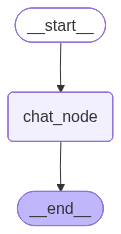

In [10]:
chatbot

In [11]:
initial_state = {
    'messages': [HumanMessage(content="what is the capital of india?")]
}

In [13]:
chatbot.invoke(initial_state)['messages'][-1]

AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--f14beac5-c5e2-4520-a935-addff4ce2c2e-0', usage_metadata={'input_tokens': 7, 'output_tokens': 10, 'total_tokens': 17, 'input_token_details': {'cache_read': 0}})

In [21]:
thread_id = '1'

while True:

    user_message = input('Type Here: ')

    print('User:', user_message)

    if user_message.strip().lower() in ['exit','quit','bye']:
        print('Exiting chat... Thank you!')
        break
    
    config = {'configurable': {'thread_id': thread_id}}

    response = chatbot.invoke({'messages':[HumanMessage(content=user_message)]}, config=config)

    print('AI: ', response['messages'][-1].content)


User: Hello My name is tuhsar
AI:  Hello Tuhsar! It's nice to meet you. How can I help you today?
User: what is my name ?
AI:  Your name is Tuhsar.
User: my age is 24
AI:  Okay, Tuhsar, age 24. How can I help you today?
User: can you tell me my details
AI:  I know two things about you:

*   Your name is Tuhsar.
*   You are 24 years old.

That's all the information I have about you. I have no access to any other personal details. I am designed to protect your privacy.
User: can you add upto 10 to 100
AI:  Okay, I can add the numbers from 10 to 100. Here's how we can do it:

This is an arithmetic series. We can use the following formula to calculate the sum:

Sum = (n/2) * (first term + last term)

Where:

*   n = number of terms
*   first term = 10
*   last term = 100

First, let's find 'n': The numbers are 10, 11, 12,...100. So,  n = 100 - 10 + 1 = 91

Now, plug the values into the formula:

Sum = (91/2) * (10 + 100)
Sum = (91/2) * 110
Sum = 91 * 55
Sum = 5005

Therefore, the sum of th

In [22]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='Hello My name is tuhsar', additional_kwargs={}, response_metadata={}, id='b2bea5f2-e53c-4d4c-afc4-1d78300d43c1'), AIMessage(content="Hello Tuhsar! It's nice to meet you. How can I help you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--69df8bcf-69c2-4bed-ba71-c8ad929886cc-0', usage_metadata={'input_tokens': 7, 'output_tokens': 21, 'total_tokens': 28, 'input_token_details': {'cache_read': 0}}), HumanMessage(content='what is my name ?', additional_kwargs={}, response_metadata={}, id='50ee5794-fcf2-459f-b00c-575862d0df38'), AIMessage(content='Your name is Tuhsar.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-f